**1. Provide summary statistics (mean, median, minimum, maximum, standard deviation) for a dataset
(age, income etc.) with numeric variables grouped by one of the qualitative (categorical) variables.
For example, if your categorical variable is age groups and quantitative variable is income, then
provide summary statistics of income grouped by the age groups. Create a list that contains a numeric
value for each response to the categorical variable.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('age_income_dataset.csv')

In [3]:
df

,Student_ID,Age,Gender,Family_Income,Final_Score
0,1,22,Female,108277,81
1,2,25,Female,116118,52
2,3,20,Male,27450,84
3,4,23,Male,55632,61
4,5,25,Female,67003,60
5,6,25,Female,117979,57
6,7,19,Male,108251,89
7,8,22,Female,78052,98
8,9,18,Male,105100,87
9,10,22,Female,22214,63


In [4]:
df.head()

,Student_ID,Age,Gender,Family_Income,Final_Score
0,1,22,Female,108277,81
1,2,25,Female,116118,52
2,3,20,Male,27450,84
3,4,23,Male,55632,61
4,5,25,Female,67003,60


In [5]:
df.tail()

,Student_ID,Age,Gender,Family_Income,Final_Score
25,26,18,Male,49598,95
26,27,19,Male,54331,99
27,28,25,Male,116986,69
28,29,22,Male,69072,41
29,30,21,Female,95638,85


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     30 non-null     int64 
 1   Age            30 non-null     int64 
 2   Gender         30 non-null     object
 3   Family_Income  30 non-null     int64 
 4   Final_Score    30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [7]:
df.describe()

,Student_ID,Age,Family_Income,Final_Score
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,21.366667,76366.566667,70.366667
std,8.803408,2.470283,29398.708606,17.267636
min,1.000000,18.000000,22214.000000,41.000000
25%,8.250000,19.000000,54796.500000,55.500000
50%,15.500000,21.500000,76382.500000,73.000000
75%,22.750000,23.750000,102761.000000,84.750000
max,30.000000,25.000000,119668.000000,99.000000


In [8]:
df.isnull().sum()

Student_ID       0
Age              0
Gender           0
Family_Income    0
Final_Score      0
dtype: int64

In [9]:
df["Age_Group"] = pd.cut(df["Age"],
                         bins=[17,20,23,26],
                         labels=["18-20","21-23","24-26"])

df.head()


,Student_ID,Age,Gender,Family_Income,Final_Score,Age_Group
0,1,22,Female,108277,81,21-23
1,2,25,Female,116118,52,24-26
2,3,20,Male,27450,84,18-20
3,4,23,Male,55632,61,21-23
4,5,25,Female,67003,60,24-26


In [11]:
grouped_stats = df.groupby("Age_Group", observed=False)["Family_Income"].agg(
    ["mean","median","min","max","std"]
)

grouped_stats



,mean,median,min,max,std
Age_Group,,,,,
18-20,77536.461538,78925.0,27450,119668,29920.826770
21-23,74351.555556,78052.0,22214,108277,24991.359112
24-26,76732.375000,69287.5,27970,117979,36389.201243


In [13]:
group_18_20 = df[df["Age_Group"]=="18-20"]["Family_Income"].tolist()
group_21_23 = df[df["Age_Group"]=="21-23"]["Family_Income"].tolist()
group_24_26 = df[df["Age_Group"]=="24-26"]["Family_Income"].tolist()

print("18-20 Income List:", group_18_20)
print("21-23 Income List:", group_21_23)
print("24-26 Income List:", group_24_26)

18-20 Income List: [27450, 108251, 105100, 95744, 119668, 84043, 42296, 78925, 113337, 74713, 54518, 49598, 54331]
21-23 Income List: [108277, 55632, 78052, 22214, 82239, 69629, 88411, 69072, 95638]
24-26 Income List: [116118, 67003, 117979, 59505, 27970, 36726, 71572, 116986]


<Figure size 600x500 with 0 Axes>

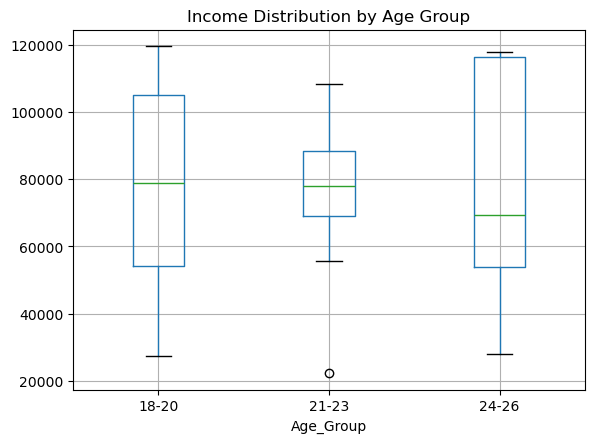

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot(column="Family_Income", by="Age_Group")
plt.title("Income Distribution by Age Group")
plt.suptitle("")
plt.show()


In [15]:
group_21_23 = df[df["Age_Group"]=="21-23"]

Q1 = group_21_23["Family_Income"].quantile(0.25)
Q3 = group_21_23["Family_Income"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = group_21_23[
    (group_21_23["Family_Income"] < lower) | 
    (group_21_23["Family_Income"] > upper)
]

outliers


,Student_ID,Age,Gender,Family_Income,Final_Score,Age_Group
9,10,22,Female,22214,63,21-23


In [18]:
df[df["Age_Group"]=="21-23"]["Family_Income"]



0     108277.0
3      55632.0
7      78052.0
9      22214.0
12     82239.0
16     69629.0
20     88411.0
28     69072.0
29     95638.0
Name: Family_Income, dtype: float64

In [19]:
df[df["Age_Group"]=="21-23"]["Family_Income"].describe()


count         9.000000
mean      74351.555556
std       24991.359112
min       22214.000000
25%       69072.000000
50%       78052.000000
75%       88411.000000
max      108277.000000
Name: Family_Income, dtype: float64

In [20]:
df.loc[df["Family_Income"] < lower, "Family_Income"] = lower
df.loc[df["Family_Income"] > upper, "Family_Income"] = upper


<Figure size 600x500 with 0 Axes>

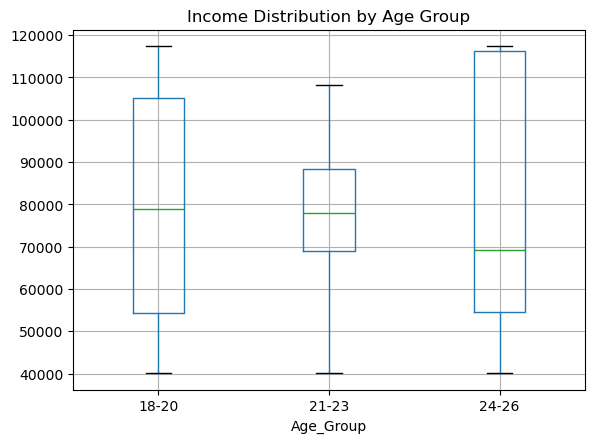

In [21]:
plt.figure(figsize=(6,5))
df.boxplot(column="Family_Income", by="Age_Group")
plt.title("Income Distribution by Age Group")
plt.suptitle("")
plt.show()

**2. Write a Python program to display some basic statistical details like percentile, mean, standard
deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris- versicolor’ of iris.csv dataset.**

In [22]:
df = pd.read_csv('Iris.csv')

In [23]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [33]:
df["Species"].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
df.groupby("Species").mean()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [36]:
df.groupby("Species").std()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,14.57738,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,14.57738,0.516171,0.313798,0.469911,0.197753
Iris-virginica,14.57738,0.635880,0.322497,0.551895,0.274650


In [38]:
for species in df["Species"].unique():
    print("\nStatistics for:", species)
    print(df[df["Species"] == species].describe())



Statistics for: Iris-setosa
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Statistics for: Iris-versicolor
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798  

In [40]:
df.groupby("Species").quantile([0.25, 0.50, 0.75])


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                                    
Iris-setosa     0.25   13.25          4.800         3.125          1.400   
                0.50   25.50          5.000         3.400          1.500   
                0.75   37.75          5.200         3.675          1.575   
Iris-versicolor 0.25   63.25          5.600         2.525          4.000   
                0.50   75.50          5.900         2.800          4.350   
                0.75   87.75          6.300         3.000          4.600   
Iris-virginica  0.25  113.25          6.225         2.800          5.100   
                0.50  125.50          6.500         3.000          5.550   
                0.75  137.75          6.900         3.175          5.875   

                      PetalWidthCm  
Species                             
Iris-setosa     0.25           0.2  
                0.50           0.2  
                0.75           0.3  
Iris-versicolor 0.25           1.2  
                0.50           1.3  
                0.75           1.5  
Iris-virginica  0.25           1.8  
                0.50           2.0  
                0.75           2.3